In [3]:
from lib import prob
from lib import vector as vec
import matplotlib.pyplot as plt
import random
from collections import Counter

In [5]:
# de mere's game

# the probability of throwing a 6 on a die roll
p = 1/6  

# given a specific number of throws (a round),
# count how many times 6 shows up
round_count = lambda throws: prob.binomial(throws, p)

# play this game a lot of times, to estimate the likelihood of
# winning if one bets on "at least one 6 shows up in 4 throws of an even die"

n_rounds = 10000
wins = sum([round_count(4) > 0 for _ in range(n_rounds)])
print(f"You won {100 * wins/n_rounds:0.2f}% of {n_rounds} throws")


You won 52.61% of 10000 throws


In [6]:
# de mere's one-up: two dice, pair of sixes

round = lambda throws,dice: list(zip(*[vec.create_random(throws, 1, 6) for _ in range(dice)]))

dice = 2
n_rounds = 1000
winning_throw = (6,6)

# play
for throws_per_round in range(20, 30):
    wins = 0
    for _ in range(n_rounds):
        round_win = winning_throw in round(throws_per_round, dice)
        wins = wins + round_win
    print(f" Throws per round: {throws_per_round} ; chance of a winning throw : {100*wins/n_rounds:0.2f}%")

 Throws per round: 20 ; chance of a winning throw : 44.20%
 Throws per round: 21 ; chance of a winning throw : 44.10%
 Throws per round: 22 ; chance of a winning throw : 45.00%
 Throws per round: 23 ; chance of a winning throw : 47.10%
 Throws per round: 24 ; chance of a winning throw : 48.60%
 Throws per round: 25 ; chance of a winning throw : 47.40%
 Throws per round: 26 ; chance of a winning throw : 51.80%
 Throws per round: 27 ; chance of a winning throw : 56.90%
 Throws per round: 28 ; chance of a winning throw : 55.70%
 Throws per round: 29 ; chance of a winning throw : 56.00%


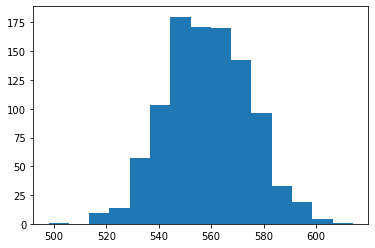

In [7]:
# what does the distribution of wins look like, for a given number of throws per round?

n_sims = 1000
wins = []

for __ in range(n_sims):
    w = 0
    for _ in range(n_rounds):
        round_win = winning_throw in round(throws_per_round, dice)
        w = w + round_win
    wins.append(w)
    
plt.hist(wins, bins = 15)
plt.show()

### Coin flips

In [8]:
# Example 1.4 - Peter and Paul's game

def flip_coins(n):
    return ''.join(["H" if prob.bernoulli(0.5) else "T" for _ in range(n)])


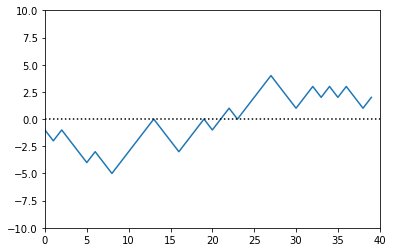

In [11]:
times = 40
flips = flip_coins(times)

balance = 0
streak = []
win = 1  # weight each win
lose = 1 # weight each loss

for outcome in flips:
    balance = balance + (1*win if outcome == "H" else -1*lose)
    streak.append(balance)
    
plt.plot(streak)
plt.axhline(y=0, color='black', linestyle=":")
ylim = abs(max(streak, key=abs))+5
plt.axis([0, len(flips), -ylim, ylim])
plt.show()

In [12]:
print(flips)

TTHTTTHTTHHHHHTTTHHHTHHTHHHHTTTHHTHTHTTH


## 1.1 Simulation of discrete probabilities

**Exercise 1**

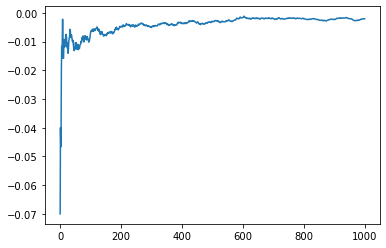

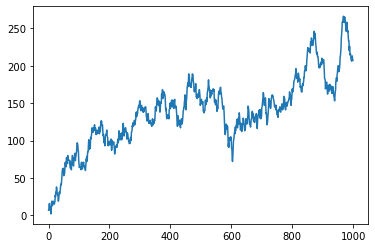

In [34]:

coin_flip = lambda: prob.bernoulli(0.5)

trials = 100000
heads = 0
heads1 = []
heads2 = []

for i in range(1,trials+1):    
    heads += coin_flip()
    if i % 100 == 0:
        heads1.append((heads/i) - 0.5)
        heads2.append(abs(heads - 0.5*i))
        
plt.plot(heads1)
plt.show()
plt.plot(heads2)
plt.show()

**Exercise 2**

Toss a coin _n_ times and record whether or not the proportion of heads is within .1 of .5. Have your program repeat this experiment 100 times. About how large must _n_ be so that approximately 95 out of 100 times the proportion of heads is within the specified tolerance?

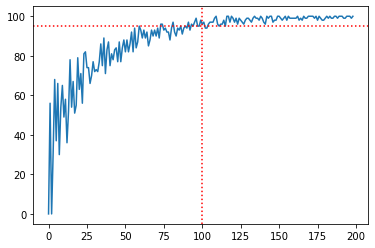

In [49]:

def coin_tosses(n, target, tolerance):
    heads = 0
    for _ in range(n):
        heads += coin_flip()
    return (target - tolerance) <= (heads/n) <= (target + tolerance)


def simulate(times, n):
    return [coin_tosses(n, 0.5, 0.1) for _ in range(times)]

out = []
for n in range(1,200):
    out.append(sum(simulate(100, n)))

plt.plot(out)
plt.axhline(y=95, color='red', linestyle=":")
plt.axvline(x=100, color='red', linestyle=":")
plt.show()

**Exercise 3**

In the early 1600s, Galileo was asked to explain the fact that, although the number of triples of integers from 1 to 6 with sum 9 is the same as the number of such triples with sum 10, when three dice are rolled, a 9 seemed to come up less often than a 10 - supposedly in the experience of gamblers.

 - write a program to simulate the roll of three dice a large number of times and keep track of the proportion of times that the sum is 9 and the proportion of times the sum is 10
 - can you conclude from your simulations that the gamblers were correct?

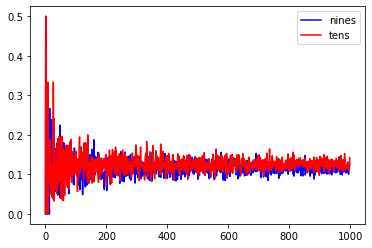

In [117]:
# simulate a die cast
cast_die = lambda: 1 + int(6 * random.random())

def cast_dice(n = 3, times = 3):
    outs = []
    for _ in range(times):
        outs.append(sum([cast_die() for _ in range(n)]))
    return outs

nines = []
tens = []
for times in range(1,1000):
    nines.append(cast_dice(3, times).count(9)/times)
    tens.append(cast_dice(3, times).count(10)/times)

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(nines, c='b', label='nines')
ax1.plot(tens,  c='r', label='tens')
plt.legend(loc='upper right');
plt.show()

**Exercise 4**

In raquetball,a player continues to serve as long as sheis winning;a point is scored only when a player is serving and wins the volley.  The first player to win 21 points wins the game. 

Assume that you serve first and have a probability .6 of winning a volley when you serve and probability .5 when your opponent serves.

Estimate, by simulation, the probability that you will win a game.

In [139]:

def game(targetpoints = 21):
    
    serve = lambda: prob.bernoulli(0.6)
    receive = lambda: prob.bernoulli(0.5)
    p1, p2 = 0, 0
    p1_serve = True
    while p1 < targetpoints and p2 < targetpoints:
        if p1_serve:
            if serve():
                p1 += 1
            else:
                p1_serve = False
        else:
            if receive():
                p1_serve = True
            else:
                p2 += 1
    return p1 > p2

# find likelihood of winning by playing a million games
simulations = 1000000
p_win = sum([game() for _ in range(simulations)])/simulations

print(f"Probability of winning a game : {p_win:0.2f}")

Probability of winning a game : 0.83


**Exercise 5**

Consider the bet that all three dice will turn up sixes at least once in $n$ rolls of three dice. Calculate $f(n)$, the probability of at least one triple-six when three dice are rolled. 

Determine the smallest value of $n$ necessary for a favorable bet that a triple-six will occur when three dice are rolled $n$ times.

DeMoivre would say it should be about $216(log2) = 149.7$, and so would answer 150

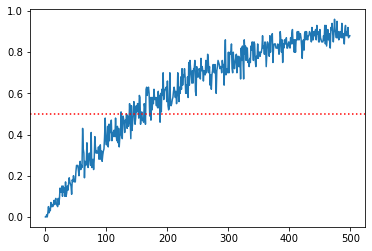

In [159]:
die_cast = lambda: 1 + int(6*random.random())

def roll_3_sixes():
    return sum([die_cast() for _ in range(3)]) == 18

def game(throws):
    # you win if you roll three sixes at least once
    return sum([roll_3_sixes() for _ in range(throws)]) > 0


nsims = 100
p_win = []
for throws in range(0, 500):
    p_win.append(sum([game(throws) for _ in range(nsims)])/nsims)
    
plt.plot(p_win)
plt.axhline(y=0.5, color='red', linestyle=":")
plt.show()

**Exercise 6**

In Las Vegas, a roulette wheel has 38 slots numbered 0, 00, 1, 2, 3, ..., 36. The 0 and 00 slots are green and half the remaining 36 slots are red with the other half black.

Write a program to find the total winnings for a player who makes 1000 bets on red

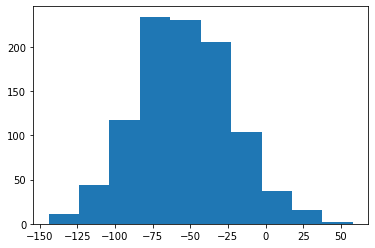

In [192]:
def roulette(bet):
    # return whether the bet has won. you can bet on red, green, or black
    p = random.random()

    green = p <= 2/38 and bet == "green"
    red   = (2/38 < p <= 20/38) and bet == "red" 
    black = (20/38 < p <= 1) and bet == "black"
    
    return True if green or red or black else False

def winnings(color, n_bets = 1000, bet = 1):
    wins = sum([roulette(color) for _ in range(n_bets)]) 
    losses = n_bets - wins
    return (wins - losses) * bet


out = [winnings("red") for _ in range(1000)]
plt.hist(out)
plt.show()

**Exercise 7**

Another form of bet for roulette is to bet that a specific number (say 17) will turn up. If the ball stops on your number, you get your dollar back plus 35 dollars. If not, you lose your dollar. 

Write a program that will plot your winnings when you make 500 plays of roulette at LasVegas, first when you bet each time on red (see Exercise 6), and then for a second visit to Las Vegas when you make 500 plays betting each  time on the number 17. What differences do you see in the graphs of your winnings on these two occasions?

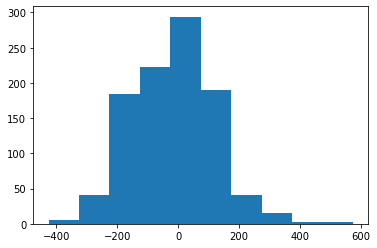

In [189]:
roulette_number = lambda: 36 if prob.bernoulli(1/38) else -1

wins = [(sum(roulette_number() for _ in range(500))) for i in range(1000)]
plt.hist(wins)
plt.show()

**Exercise 8**

An astute student noticed that,in our simulation of the game of heads or tails (see Example 1.4), the proportion of times the player is always in the lead is very close to the proportion of times that the player's total winnings end up 0.

Work out these probabilities by enumeration of all cases for two tosses and for four tosses, 
and see if you think that these probabilities are, in fact, the same.

**Exercise 9**

The _Labouchere_ system for roulette is played as follows. Write down a list of numbers, usually 1, 2, 3, 4. Bet the sum of the first and the last, $1 + 4 = 5$, on red. If you win, delete the first and the last numbers from your list. If you lose, add the amount that you last bet to the end of your list. Then use the new list and bet the sum of the first and last numbers (if there is only one number, bet that amount). Continue until your list becomes empty. 

Show that, if this happens, you win the sum $1 + 2 + 3 + 4 = 10$, of your original list. Simulate this system and see if you do always stop, and hence, always win. If so, why is this not a foolproff gambling system?

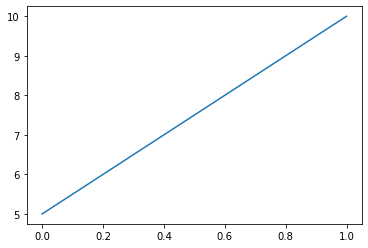

Winnings in 2 plays: 10 (Final bet generator: [])


In [48]:
red = lambda: prob.bernoulli(16/38)

def labouchere(bet_generator =  [1,2,3,4], max_plays = 100, plot = False):
    plays = 0
    winnings = 0
    win_log = []
    while bet_generator:
        if plays > max_plays:
            break
        plays = plays + 1
        bet = bet_generator[0] + bet_generator[-1]
        if red():
            try:
                bet_generator.pop(0)
                bet_generator.pop(-1)
            except:
                pass
            winnings = winnings + bet
        else:
            bet_generator.append(bet)
            winnings = winnings - bet
        win_log.append(winnings)
        
    if plot:
        plt.plot(win_log)
        plt.show()
    return winnings, plays

w, p = labouchere(plot = True)
print(f"Winnings in {p} plays: {w} (Final bet generator: {b})")

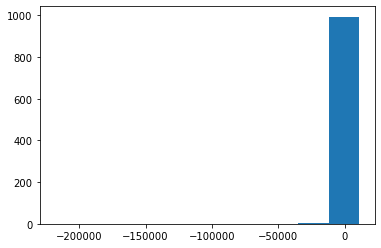

In [69]:
# play this game many times

times = 1000

wins, plays = [], []
for _ in range(times):
    w,p = labouchere([1,2,3,4], 100, False)
    wins.append(w)
    plays.append(p)
    
plt.hist(wins)
plt.show()

Ouch. These losses are catastrophic. 

**Exercise 10**

Another well known gambling system is the _martingale doubling system_. Suppose that you are betting on red to turn up in roulette. Every time you win, bet 1 dollar next time. Everytime you lose, double your previous bet. 

Suppose that you use this sytem until you have won at least 5 dollars or you have lost more than 100 dollars. Write a program to simulate this and play it a number of times and see how you do. 

In his book _The Newcomes_, W. M. Thackeray remars, "You have not played as yet? Do not do so; above all avoid a martingale if you do."

Was this good advice?

In [80]:
def martingale(win = 5, loss = -100):
    winnings = 0
    bet = 1
    while loss < winnings < win:
        if red():
            winnings = winnings + bet
            bet = 1
        else:
            winnings = winnings - bet
            bet = bet * 2
    return winnings

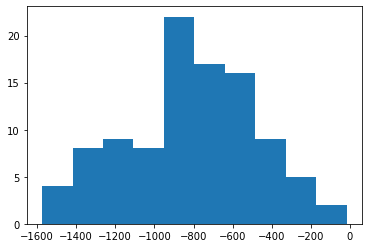

In [87]:
def play_martingale(times = 100):
    return sum([martingale() for _ in range(times)])

plt.hist([play_martingale() for _ in range(100)])
plt.show()

This is a terrible idea. Don't play the martingale!


From [Wikipedia](https://en.wikipedia.org/wiki/Martingale_(betting_system)):

    The fundamental reason why all martingale-type betting systems fail is that no amount of information about the results of past bets can be used to predict the results of a future bet with accuracy better than chance.